<a href="https://colab.research.google.com/github/YinkaO-web/My-First-Website/blob/main/Baltimore_WeatherHouse_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing all data sets into their own Data Frames
weather = pd.read_csv("/content/drive/MyDrive/CodeWorks_2024_Resources/met_data_baltimore.csv")
vacant = pd.read_csv("/content/drive/MyDrive/CodeWorks_2024_Resources/Percentage_of_Residential_Properties_that_are_Vacant_and_Abandoned.csv")
weatherHouse = pd.read_csv("/content/drive/MyDrive/CodeWorks_2024_Resources/Percent_of_Homes_Weatherized.csv")
allHouse = pd.read_csv("/content/drive/MyDrive/CodeWorks_2024_Resources/Total_Number_of_Residential_Properties.csv")


In [ ]:
# Selects the appropiate rows and columns frome each data set (excluding weather)
weatherH_cols = weatherHouse.iloc[:, 1:9].T
vacant_cols = vacant.iloc[:, 1:9].T
allH_cols = allHouse.iloc[:, 1:9].T

#Gets the year span 2010-2016 in a data frame, based on the unique years that show up in weather
years = pd.DataFrame(pd.unique(weather['year']))
year_span = years.iloc[30:37, :]
year_span

# Mapping the relative change in rainfall by finding the sums of all rainfall for each
all_rain_sum = pd.DataFrame()
mean_Max_T = pd.DataFrame()
mean_Min_T = pd.DataFrame()
for i in year_span[0]:

  #gathers all rows where the year is from 2010 - 2016 inclusive
  all_year_sel = weather[weather['year'] == i]
  rain_sum = all_year_sel['rain'].sum()
  all_rain_sum[i] = [rain_sum]
  mean_Max_T[i] = [all_year_sel['maxt'].mean()]
  mean_Min_T[i] = [all_year_sel['mint'].mean()]

almost_RMM = pd.concat([all_rain_sum, mean_Max_T], axis = 0, ignore_index = True)
RMaxMin = pd.concat([almost_RMM, mean_Min_T], axis = 0, ignore_index = True)

RMaxMin

,2010,2011,2012,2013,2014,2015,2016
0,1096.800000,1448.250000,1070.580000,1133.470000,1335.550000,1315.820000,1062.810000
1,19.174274,19.558712,20.292521,18.458575,17.383151,18.798822,19.337151
2,9.471452,9.924219,10.354274,9.170274,7.872137,9.087781,9.365699


In [ ]:
weather_indices = weatherH_cols.index.values[1:]

In [ ]:
vacant_indices = vacant_cols.index.values[1:]

In [ ]:
#This will help with getting all values in between 2010 to 2016
data_points = {'Year': [], 'Sum Rainfall': [], 'Max Temp':[], 'Min Temp':[], '%Weatherized Houses': [], '%Vacant/Abandoned Houses': []}
for i in year_span[0]:
  for j in range(0, 7):
    for k in range(len(weatherH_cols.columns)):
      data_points['Year'].append(int(i))
      data_points['Sum Rainfall'].append(float(RMaxMin.loc[0, i]))
      data_points['Max Temp'].append(float(RMaxMin.loc[1, i]))
      data_points['Min Temp'].append(float(RMaxMin.loc[2, i]))
      data_points['%Weatherized Houses'].append(weatherH_cols.loc[weather_indices[j], k])
      data_points['%Vacant/Abandoned Houses'].append(vacant_cols.loc[vacant_indices[j],k])
      #data_point = pd.DataFrame({'Year': [str(i)], 'Sum Rainfall': [float(all_rain_sum.loc[0, i])], '%Weatherized Houses': [weatherH_cols.loc[weather_indices[j], k]], '%Vacant/Abandoned Houses': [vacant_cols.loc[vacant_indices[j],k]]})
      #print({'Year': [str(i)], 'Sum Rainfall': [float(all_rain_sum.loc[0, i])], '%Weatherized Houses': [weatherH_cols.loc[weather_indices[j], k]], '%Vacant/Abandoned Houses': [vacant_cols.loc[vacant_indices[j],k]]})
      #pd.concat([df, data_point], ignore_index=True)
df = pd.DataFrame(data_points)
#print(df)
      #pd.concat([df, data_point])

In [ ]:
df

,Year,Sum Rainfall,Max Temp,Min Temp,%Weatherized Houses,%Vacant/Abandoned Houses
0,2010,1096.80,19.174274,9.471452,0.480000,4.310000
1,2010,1096.80,19.174274,9.471452,0.510000,0.280000
2,2010,1096.80,19.174274,9.471452,0.590000,1.450000
3,2010,1096.80,19.174274,9.471452,1.420000,3.740000
4,2010,1096.80,19.174274,9.471452,0.000000,0.920000
...,...,...,...,...,...,...
2690,2016,1062.81,19.337151,9.365699,0.376488,25.916930
2691,2016,1062.81,19.337151,9.365699,0.111649,4.391515
2692,2016,1062.81,19.337151,9.365699,0.094384,30.769231
2693,2016,1062.81,19.337151,9.365699,0.036088,6.784554


In [ ]:
df_arr = np.array([df['Max Temp'], df['Min Temp'], df['%Weatherized Houses'], df['%Vacant/Abandoned Houses']]).T

inertias = []
for i in range(1,8):
  kmeans = KMeans(n_clusters = i).fit(df_arr)
  inertias.append(kmeans.inertia_)

print(inertias)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[320505.1098602823, 108584.65269224707, 70447.20905102316, 36510.64246287841, 27775.81589530894, 21958.223579110956, 16487.2450501788]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


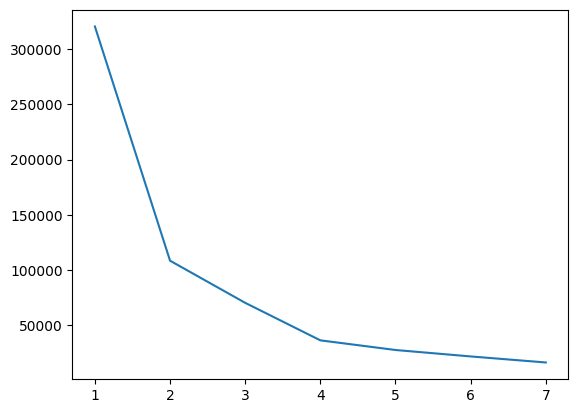

In [ ]:
fig, ax = plt.subplots()
plt.plot([1,2,3,4,5,6,7],inertias)
# There should be two different clusters

In [ ]:
kmeans = KMeans(n_clusters = 2).fit(df_arr)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
df['Cluster Label'] = kmeans.labels_
df

,Year,Sum Rainfall,Max Temp,Min Temp,%Weatherized Houses,%Vacant/Abandoned Houses,Cluster Label
0,2010,1096.80,19.174274,9.471452,0.480000,4.310000,1
1,2010,1096.80,19.174274,9.471452,0.510000,0.280000,1
2,2010,1096.80,19.174274,9.471452,0.590000,1.450000,1
3,2010,1096.80,19.174274,9.471452,1.420000,3.740000,1
4,2010,1096.80,19.174274,9.471452,0.000000,0.920000,1
...,...,...,...,...,...,...,...
2690,2016,1062.81,19.337151,9.365699,0.376488,25.916930,0
2691,2016,1062.81,19.337151,9.365699,0.111649,4.391515,1
2692,2016,1062.81,19.337151,9.365699,0.094384,30.769231,0
2693,2016,1062.81,19.337151,9.365699,0.036088,6.784554,1


In [ ]:
first_cluster = df.loc[df['Cluster Label'] == 0, :]
second_cluster = df.loc[df['Cluster Label'] == 1, :]
#third_cluster = df.loc[df['Cluster Label'] == 2, :]
#fourth_cluster = df.loc[df['Cluster Label'] == 3, :]

In [ ]:
first_cluster.count()

Year                        623
Sum Rainfall                623
Max Temp                    623
Min Temp                    623
%Weatherized Houses         623
%Vacant/Abandoned Houses    623
Cluster Label               623
dtype: int64

In [ ]:
second_cluster.count()

Year                        2072
Sum Rainfall                2072
Max Temp                    2072
Min Temp                    2072
%Weatherized Houses         2072
%Vacant/Abandoned Houses    2072
Cluster Label               2072
dtype: int64

Text(0.5, 1.0, '%Vacant/Abandoned Houses vs. Sum Rainfall')

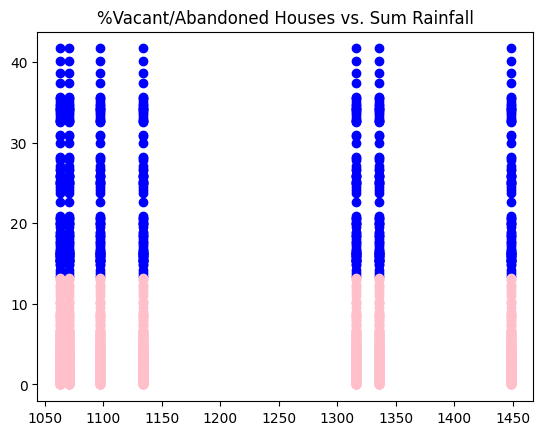

In [ ]:
plt.scatter(first_cluster['Sum Rainfall'], first_cluster['%Vacant/Abandoned Houses'], color = "Blue")
plt.scatter(second_cluster['Sum Rainfall'], second_cluster['%Vacant/Abandoned Houses'], color = "Pink")
#plt.scatter(third_cluster['Sum Rainfall'], third_cluster['%Vacant/Abandoned Houses'], color = "green")
#plt.scatter(fourth_cluster['Sum Rainfall'], fourth_cluster['%Vacant/Abandoned Houses'], color = "purple")
plt.title('%Vacant/Abandoned Houses vs. Sum Rainfall')

In [ ]:
#print(third_cluster['%Vacant/Abandoned Houses'].mean())
#print(fourth_cluster['%Vacant/Abandoned Houses'].mean())

Look into researching how the previous year's rain fall may impact/cluster with the

In [ ]:
# The average vacant/abandoned house percentages within each cluster
print(first_cluster['%Vacant/Abandoned Houses'].mean())
print(second_cluster['%Vacant/Abandoned Houses'].mean())

23.825058722359547
2.8011063642736485


Text(0.5, 1.0, '%Weatherized Houses vs. Sum Rainfall')

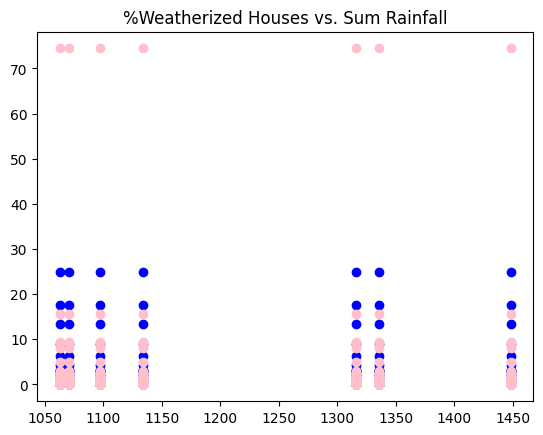

In [ ]:
plt.scatter(first_cluster['Sum Rainfall'], first_cluster['%Weatherized Houses'], color = "Blue")
plt.scatter(second_cluster['Sum Rainfall'], second_cluster['%Weatherized Houses'], color = "Pink")
#plt.scatter(third_cluster['Sum Rainfall'], third_cluster['%Weatherized Houses'], color = "green")
#plt.scatter(fourth_cluster['Sum Rainfall'], fourth_cluster['%Weatherized Houses'], color = "purple")
plt.title('%Weatherized Houses vs. Sum Rainfall')

Text(0.5, 1.0, '%Weatherized Houses vs. Maximum Temperature')

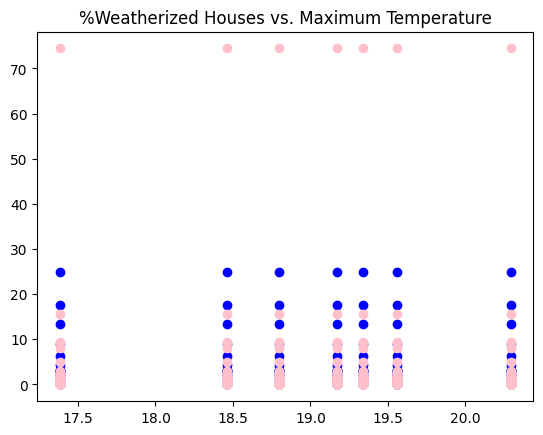

In [ ]:
# Weatherized Houses against the Max Temperatures
plt.scatter(first_cluster['Max Temp'], first_cluster['%Weatherized Houses'], color = "Blue")
plt.scatter(second_cluster['Max Temp'], second_cluster['%Weatherized Houses'], color = "Pink")
#plt.scatter(third_cluster['Max Temp'], third_cluster['%Weatherized Houses'], color = "green")
#plt.scatter(fourth_cluster['Max Temp'], fourth_cluster['%Weatherized Houses'], color = "purple")
plt.title('%Weatherized Houses vs. Maximum Temperature')

Text(0.5, 1.0, 'Weatherized House Percentages vs. Minimum Temperature')

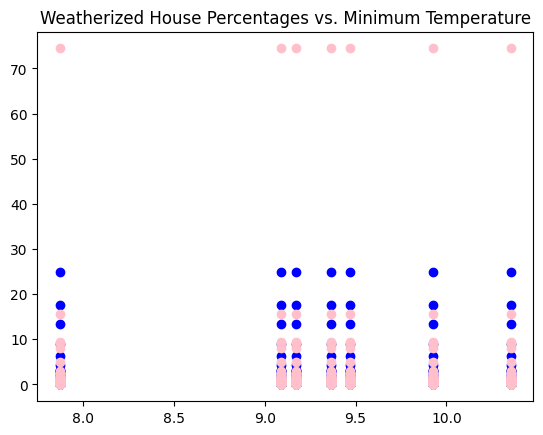

In [ ]:
#Weatherized Houses against the Min Temperatures
plt.scatter(first_cluster['Min Temp'], first_cluster['%Weatherized Houses'], color = "Blue")
plt.scatter(second_cluster['Min Temp'], second_cluster['%Weatherized Houses'], color = "Pink")
#plt.scatter(third_cluster['Min Temp'], third_cluster['%Weatherized Houses'], color = "green")
#plt.scatter(fourth_cluster['Min Temp'], fourth_cluster['%Weatherized Houses'], color = "purple")
plt.title('Weatherized House Percentages vs. Minimum Temperature')

Text(0.5, 1.0, '%Vacant/Abandoned Houses vs. Maximum Temperature')

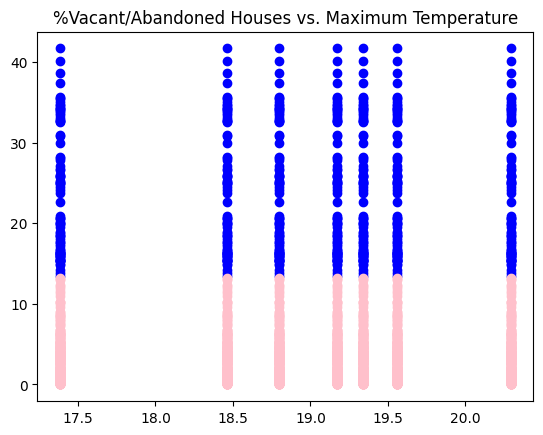

In [ ]:
#Vacant/Abandoned against the Max Temperatures
plt.scatter(first_cluster['Max Temp'], first_cluster['%Vacant/Abandoned Houses'], color = "Blue")
plt.scatter(second_cluster['Max Temp'], second_cluster['%Vacant/Abandoned Houses'], color = "Pink")
#plt.scatter(third_cluster['Max Temp'], third_cluster['%Vacant/Abandoned Houses'], color = "green")
#plt.scatter(fourth_cluster['Max Temp'], fourth_cluster['%Vacant/Abandoned Houses'], color = "purple")
plt.title('%Vacant/Abandoned Houses vs. Maximum Temperature')

Text(0.5, 1.0, '%Vacant/Abandoned Houses vs. Minimum Temperature')

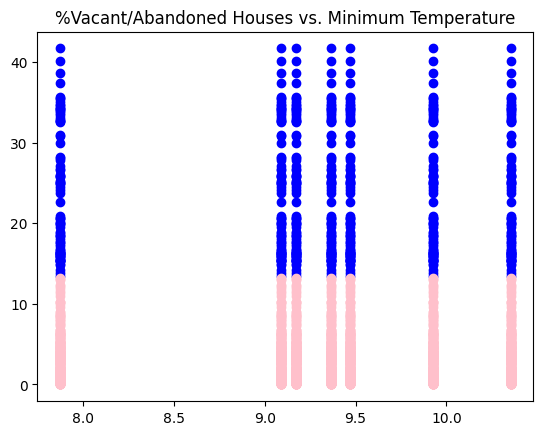

In [ ]:
#Vacant/Abandoned against the Min Temperatures
plt.scatter(first_cluster['Min Temp'], first_cluster['%Vacant/Abandoned Houses'], color = "Blue")
plt.scatter(second_cluster['Min Temp'], second_cluster['%Vacant/Abandoned Houses'], color = "Pink")
#plt.scatter(third_cluster['Min Temp'], third_cluster['%Vacant/Abandoned Houses'], color = "green")
#plt.scatter(fourth_cluster['Min Temp'], fourth_cluster['%Vacant/Abandoned Houses'], color = "purple")
plt.title('%Vacant/Abandoned Houses vs. Minimum Temperature')

Text(0.5, 1.0, '%Weatherized Houses vs. Year')

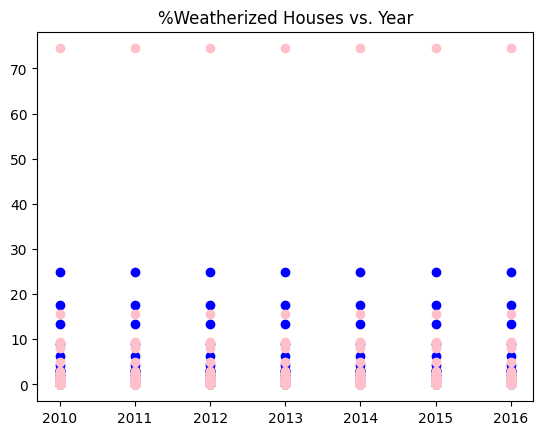

In [ ]:
plt.scatter(first_cluster['Year'], first_cluster['%Weatherized Houses'], color = 'blue')
plt.scatter(second_cluster['Year'], second_cluster['%Weatherized Houses'], color = 'pink')
#plt.scatter(third_cluster['Year'], third_cluster['%Weatherized Houses'], color = "green")
#plt.scatter(fourth_cluster['Year'], fourth_cluster['%Weatherized Houses'], color = "purple")
plt.title('%Weatherized Houses vs. Year')

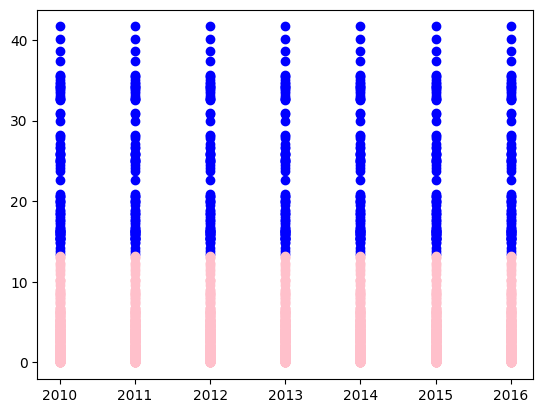

In [ ]:
plt.scatter(first_cluster['Year'], first_cluster['%Vacant/Abandoned Houses'], color = 'blue')
plt.scatter(second_cluster['Year'], second_cluster['%Vacant/Abandoned Houses'], color = 'pink')
#plt.scatter(third_cluster['Year'], third_cluster['%Vacant/Abandoned Houses'], color = "green")
#plt.scatter(fourth_cluster['Year'], fourth_cluster['%Vacant/Abandoned Houses'], color = "purple")

Text(0.5, 1.0, '%Weatherized Houses vs. %Vacant/Abandoned Houses')

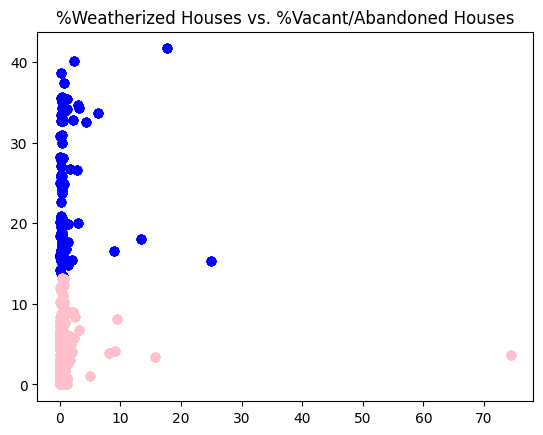

In [ ]:
plt.scatter(first_cluster['%Weatherized Houses'], first_cluster['%Vacant/Abandoned Houses'], color = 'blue')
plt.scatter(second_cluster['%Weatherized Houses'], second_cluster['%Vacant/Abandoned Houses'], color = 'pink')
#plt.scatter(third_cluster['%Weatherized Houses'], third_cluster['%Vacant/Abandoned Houses'], color = "green")
#plt.scatter(fourth_cluster['%Weatherized Houses'], fourth_cluster['%Vacant/Abandoned Houses'], color = "purple")
plt.title('%Weatherized Houses vs. %Vacant/Abandoned Houses')

In [ ]:
#print(third_cluster['%Weatherized Houses'].mean())
#print(fourth_cluster['%Weatherized Houses'].mean())

In [ ]:
print(first_cluster['%Weatherized Houses'].mean())
print(second_cluster['%Weatherized Houses'].mean())

1.3963700137769586
0.7384280523547355


In [ ]:
print((first_cluster['Sum Rainfall'].median()))
print((second_cluster['Sum Rainfall'].median()))
#print((third_cluster['Sum Rainfall'].median()))
#print((fourth_cluster['Sum Rainfall'].median()))

1133.47
1133.47


In [ ]:
print(first_cluster['Year'].mean())
print(second_cluster['Year'].mean())
#print(third_cluster['Year'].mean())
#print(fourth_cluster['Year'].mean())

2013.0
2013.0


**Border**

In [ ]:
for i in df['Year']:
  print(i)
#plt.scatter(first_cluster['%Weatherized Houses'], first_cluster['%Vacant/Abandoned Houses'], color = 'blue')
#plt.scatter(second_cluster['%Weatherized Houses'], second_cluster['%Vacant/Abandoned Houses'], color = 'pink')

2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
